<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [7]:
df = pd.read_csv("store_sharing.csv")

In [8]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
df.tail()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


In [5]:
df.sample(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
3725,2015-06-08 16:00:00,1930,15.0,15.0,59.0,28.0,2.0,0.0,0.0,1.0
3384,2015-05-25 08:00:00,539,13.0,13.0,63.0,19.0,2.0,1.0,0.0,0.0
8365,2015-12-20 10:00:00,807,13.0,13.0,77.0,20.0,1.0,0.0,1.0,3.0
10407,2016-03-14 20:00:00,814,6.0,3.0,73.5,18.0,1.0,0.0,0.0,0.0
1061,2015-02-17 07:00:00,1751,4.0,1.0,81.0,12.0,1.0,0.0,0.0,3.0


In [6]:
df.shape

(17414, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


In [9]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

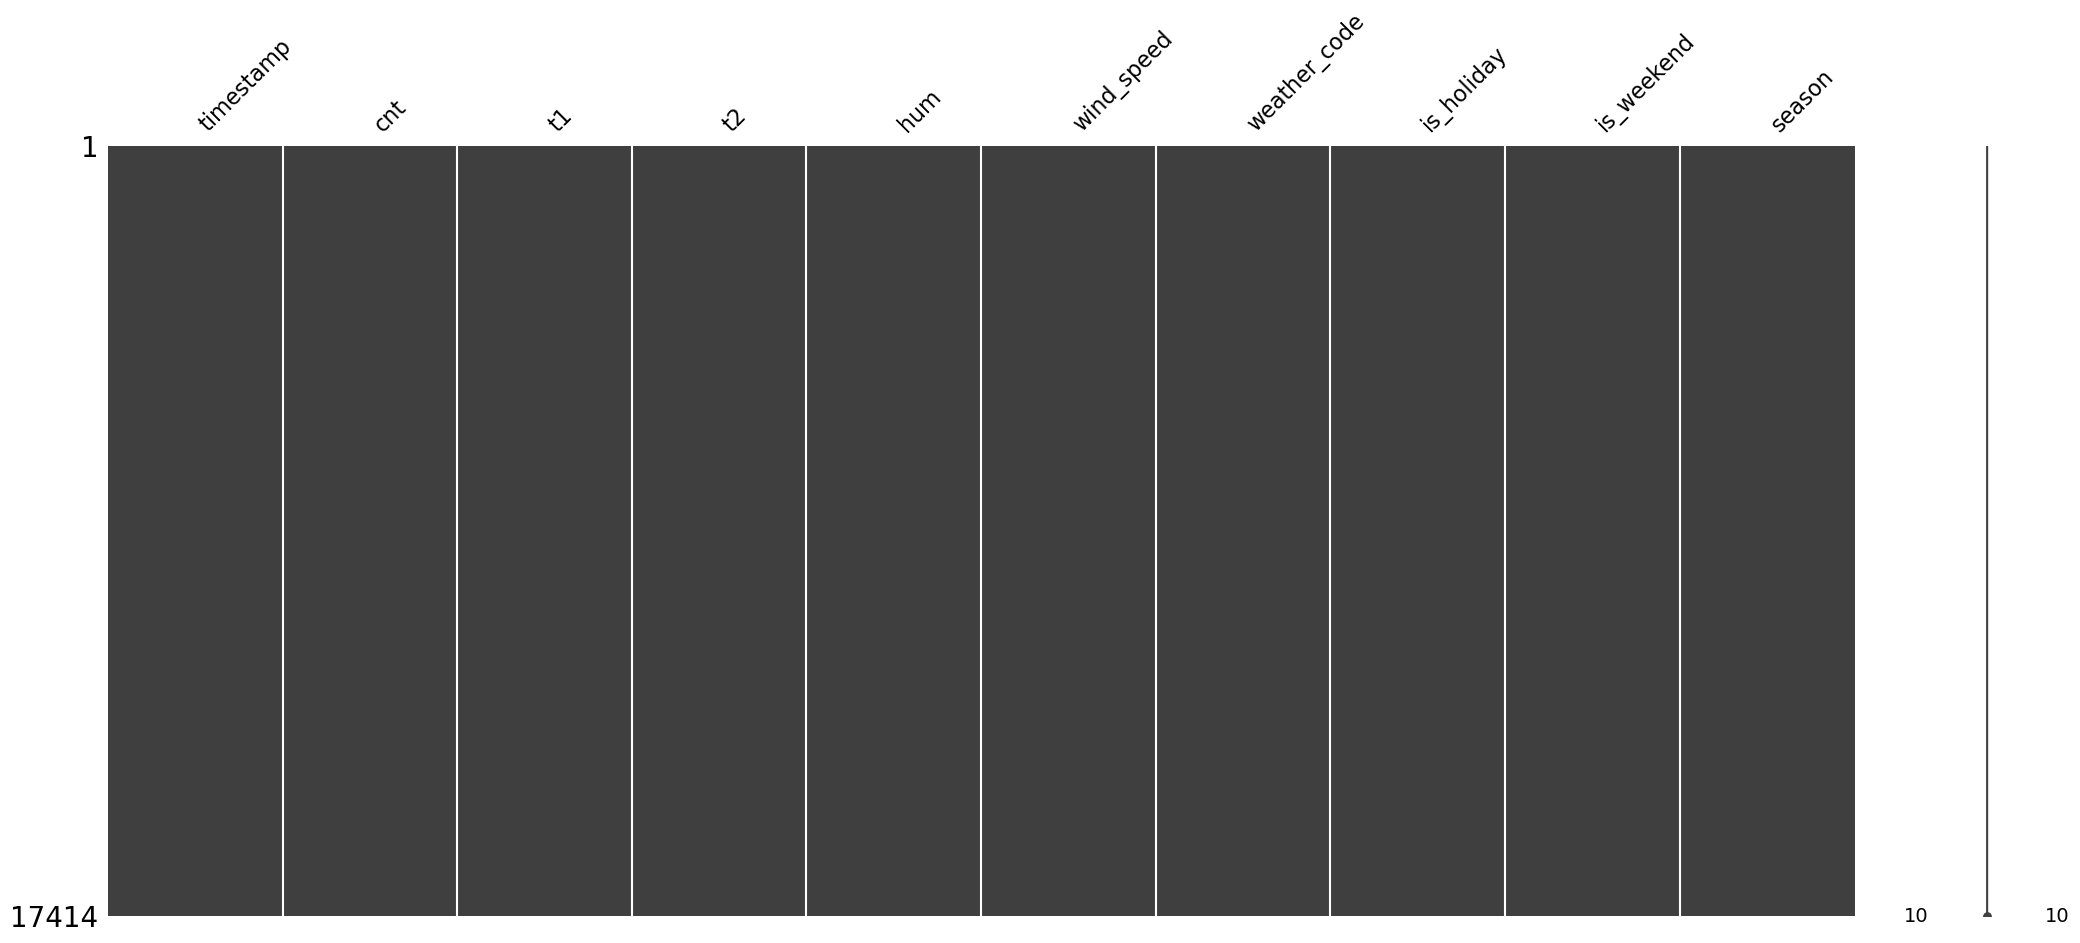

In [10]:
import missingno as msno
msno.matrix(df);

<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [11]:
df.duplicated().value_counts()

False    17414
dtype: int64

<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


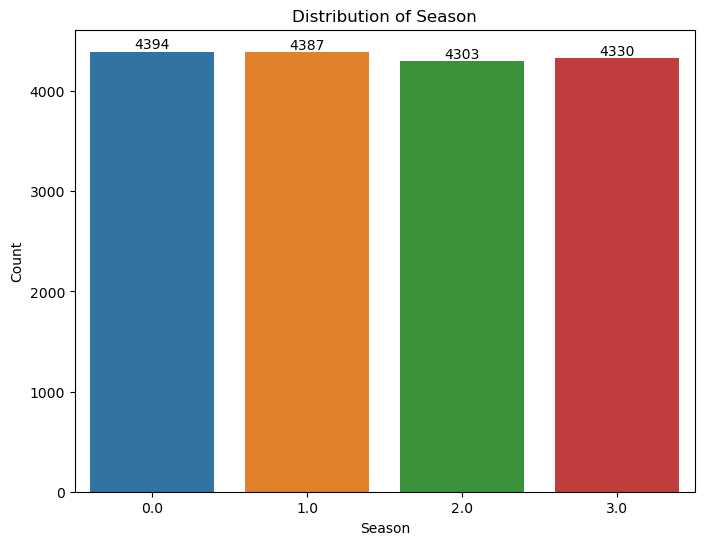

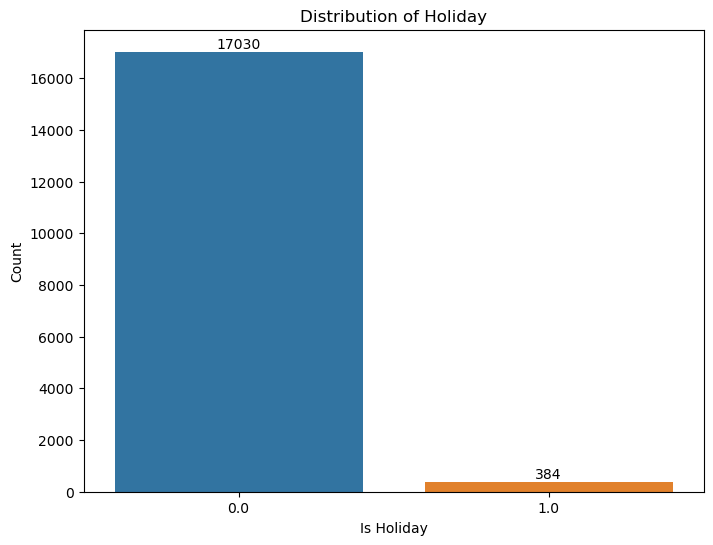

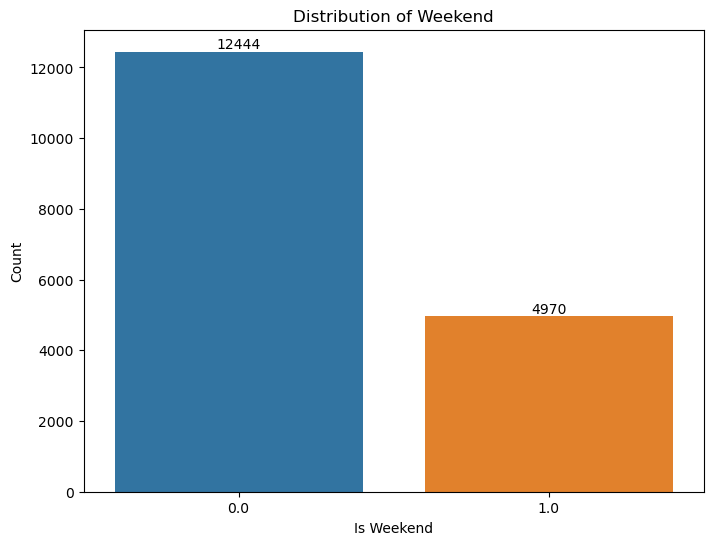

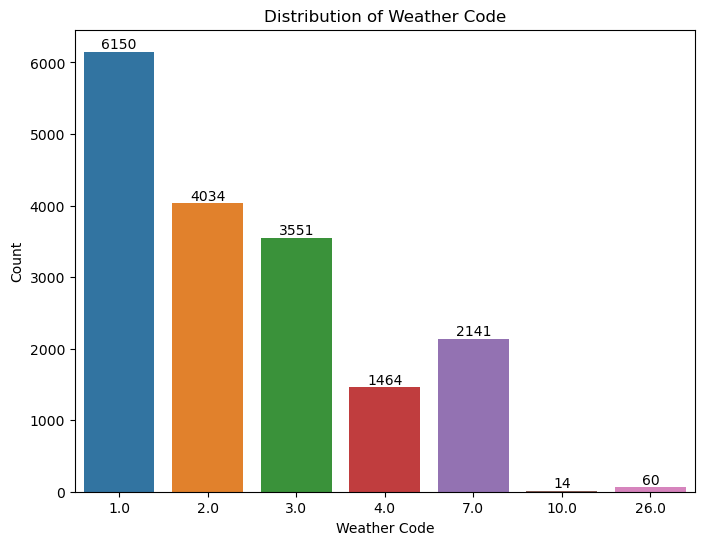

In [12]:
# Plot distribution of 'season' with count labels
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='season')
ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.set_title('Distribution of Season')

# Add count labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Plot distribution of 'is_holiday' with count labels
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='is_holiday')
ax.set_xlabel('Is Holiday')
ax.set_ylabel('Count')
ax.set_title('Distribution of Holiday')

# Add count labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Plot distribution of 'is_weekend' with count labels
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='is_weekend')
ax.set_xlabel('Is Weekend')
ax.set_ylabel('Count')
ax.set_title('Distribution of Weekend')

# Add count labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Plot distribution of 'weather_code' with count labels
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='weather_code')
ax.set_xlabel('Weather Code')
ax.set_ylabel('Count')
ax.set_title('Distribution of Weather Code')

# Add count labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()



# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [13]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [14]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set 'timestamp' as the index
df.set_index('timestamp', inplace=True)

In [15]:
df.dtypes

cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [16]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

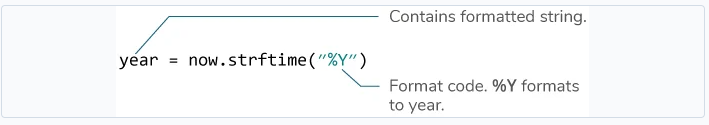

In [17]:
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

In [18]:
df.index.year

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='timestamp', length=17414)

In [19]:
f = lambda x: x.strftime('%Y-%m') 
df['year_month'] = f(df.index)

df['year'] = df.index.year
df['month'] = df.index.month
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['hour'] = df.index.hour

In [20]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

In [21]:
df.corr()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.166633,-0.051698,-0.096499,-0.116180,0.010046,0.063757,-0.017887,-0.068688,0.324423
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.097114,-0.042233,-0.005342,-0.285851,-0.037959,0.332712,0.005072,-0.002317,0.168708
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.098385,-0.040051,-0.008510,-0.285900,-0.044972,0.368366,0.006791,-0.006824,0.153956
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.334750,0.032068,0.028098,0.290381,0.072443,0.113149,-0.020868,0.011556,-0.295653
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.124803,-0.002606,0.011479,0.010305,-0.094739,-0.086383,0.002040,0.001708,0.141792
weather_code,-0.166633,-0.097114,-0.098385,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976,-0.009234,-0.033253,0.001904,0.020619,-0.041786
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,0.012939,1.000000,-0.094898,-0.032488,0.034631,-0.011511,0.042657,-0.144628,-0.000288
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,0.042362,-0.094898,1.000000,0.001067,0.003049,-0.005406,0.005721,0.791975,0.001803
season,-0.116180,-0.285851,-0.285900,0.290381,0.010305,0.098976,-0.032488,0.001067,1.000000,0.024400,0.203249,-0.006460,0.002356,0.000006
year,0.010046,-0.037959,-0.044972,0.072443,-0.094739,-0.009234,0.034631,0.003049,0.024400,1.000000,-0.026547,-0.021935,-0.002876,0.000542


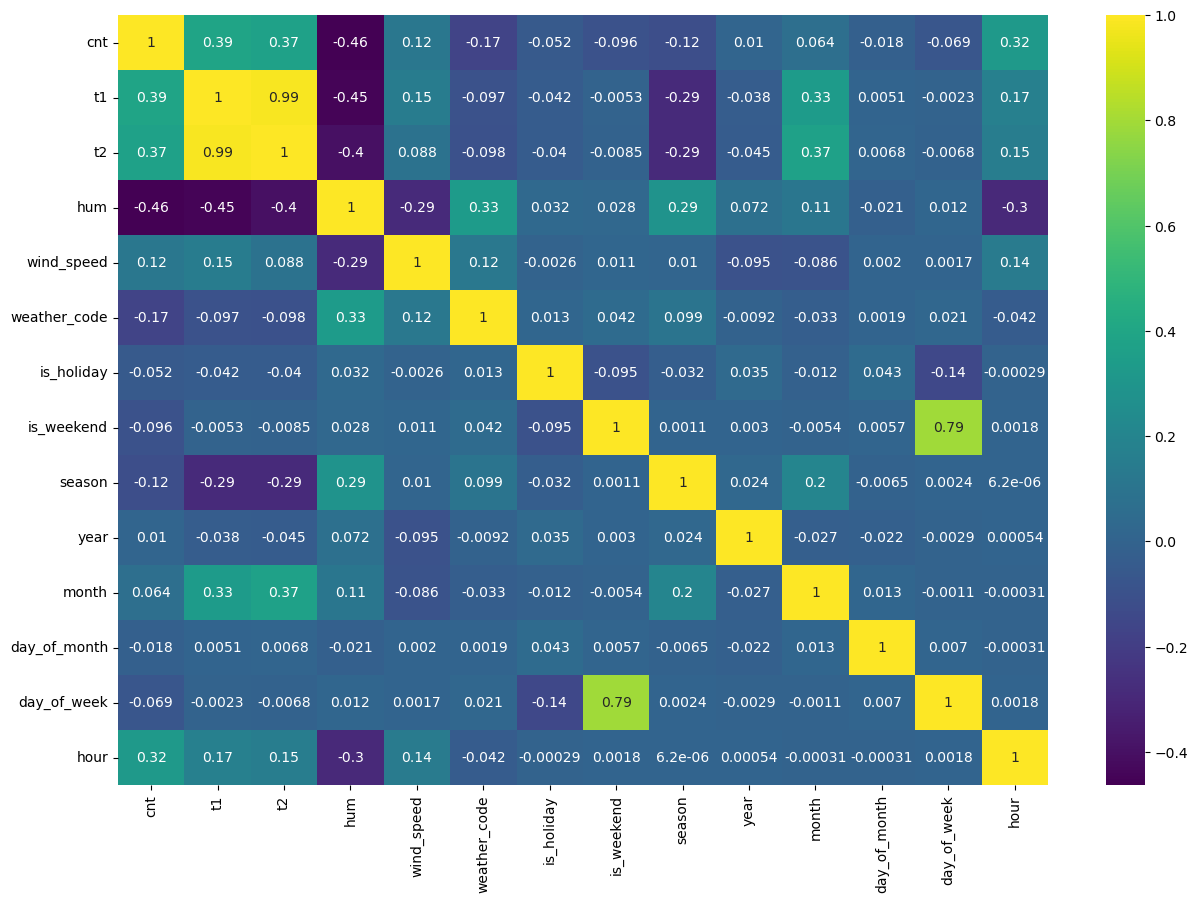

In [22]:
plt.figure(figsize = (15, 10))

sns.heatmap(df.corr(), annot = True, cmap = "viridis");

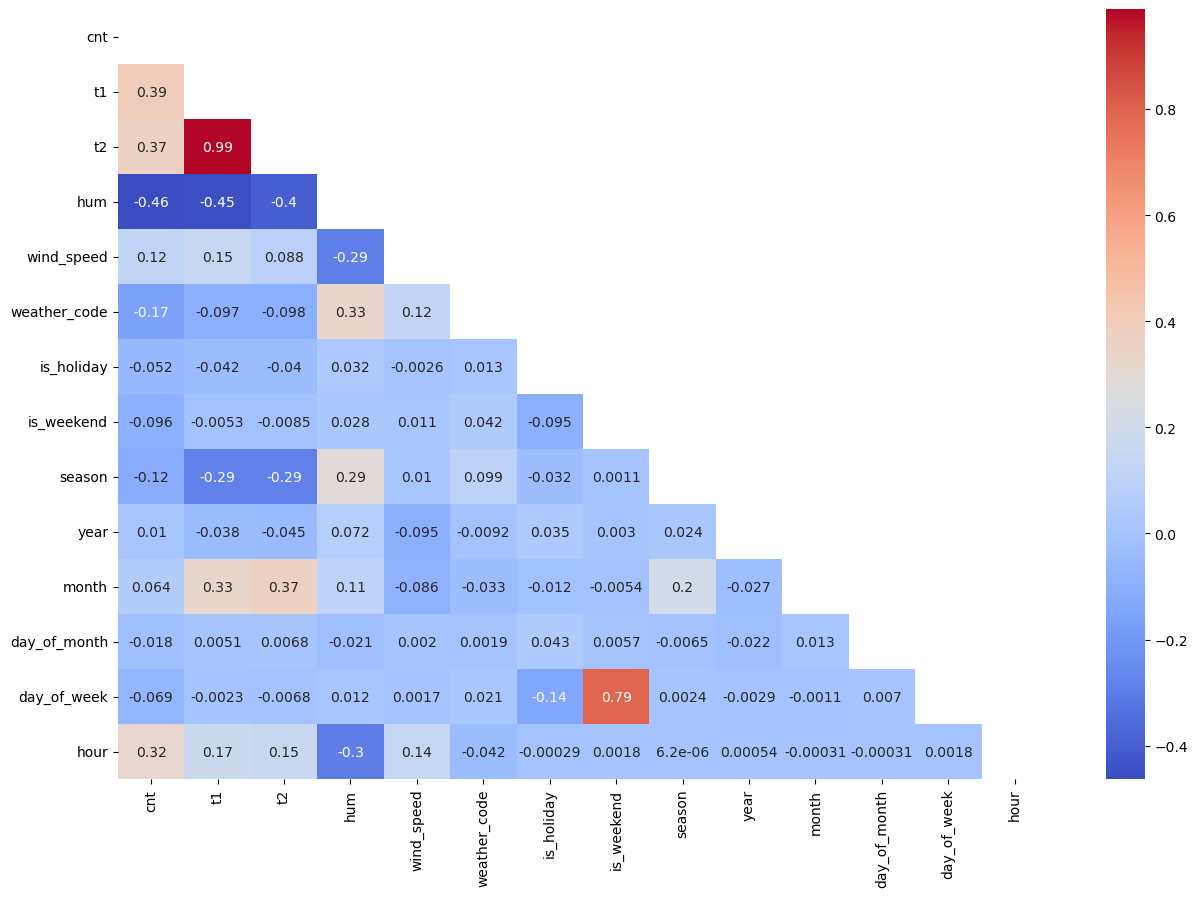

In [23]:
import numpy as np
plt.figure(figsize = (15, 10))

matrix = np.triu(df.corr())

# using the upper triangle matrix as mask 
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm", mask = matrix);

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

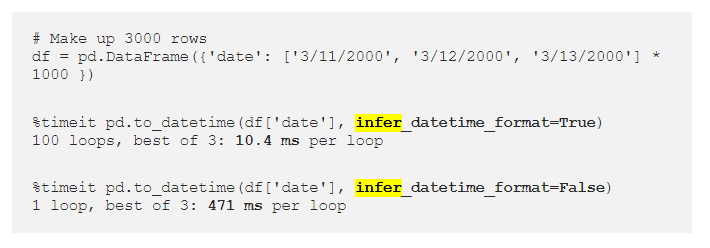

In [24]:
df.corr().iloc[:,0]

cnt             1.000000
t1              0.388798
t2              0.369035
hum            -0.462901
wind_speed      0.116295
weather_code   -0.166633
is_holiday     -0.051698
is_weekend     -0.096499
season         -0.116180
year            0.010046
month           0.063757
day_of_month   -0.017887
day_of_week    -0.068688
hour            0.324423
Name: cnt, dtype: float64

In [25]:
df_corr_cnt = df.corr()[['cnt']]
df_corr_cnt

,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
hum,-0.462901
wind_speed,0.116295
weather_code,-0.166633
is_holiday,-0.051698
is_weekend,-0.096499
season,-0.116180
year,0.010046


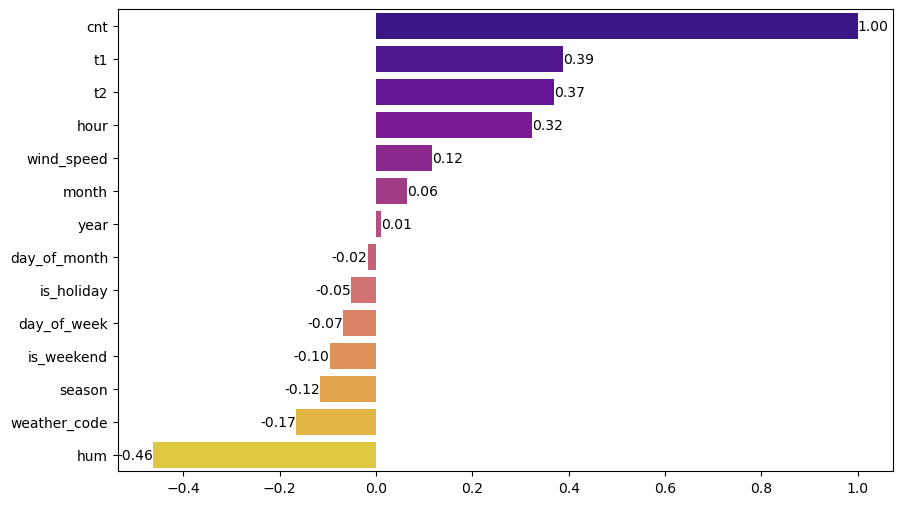

In [29]:
plt.figure(figsize=(10,6))

ax = sns.barplot(x = df.corr().iloc[:,0].sort_values(ascending = False).values,
                 y = df.corr().iloc[:,0].sort_values(ascending = False).index,
                 palette = "plasma")

for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f")

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

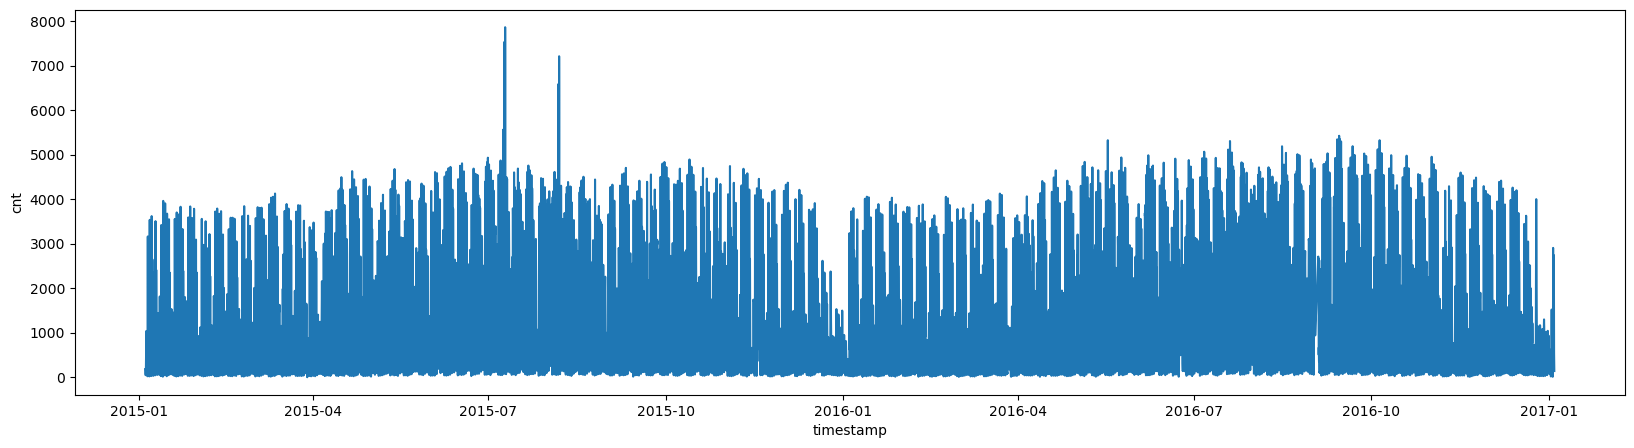

In [36]:
plt.figure(figsize = (20, 5))

sns.lineplot(x = df.index, y = 'cnt', data = df)
plt.show()

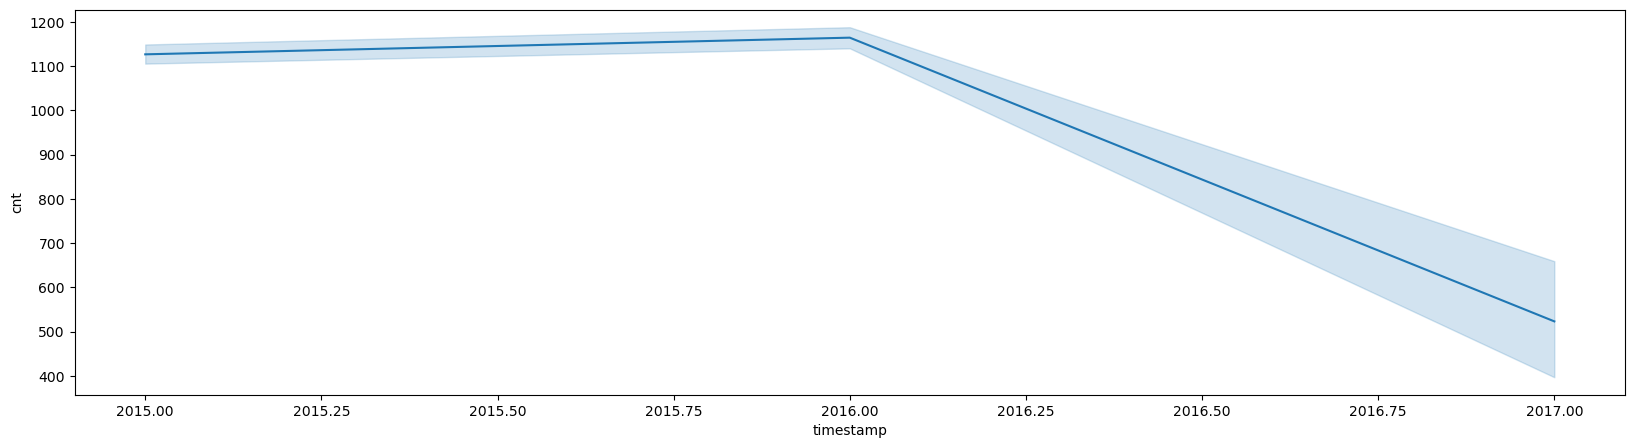

In [31]:
plt.figure(figsize = (20, 5))

sns.lineplot(x = df.index.year, y = 'cnt', data = df)
plt.show()

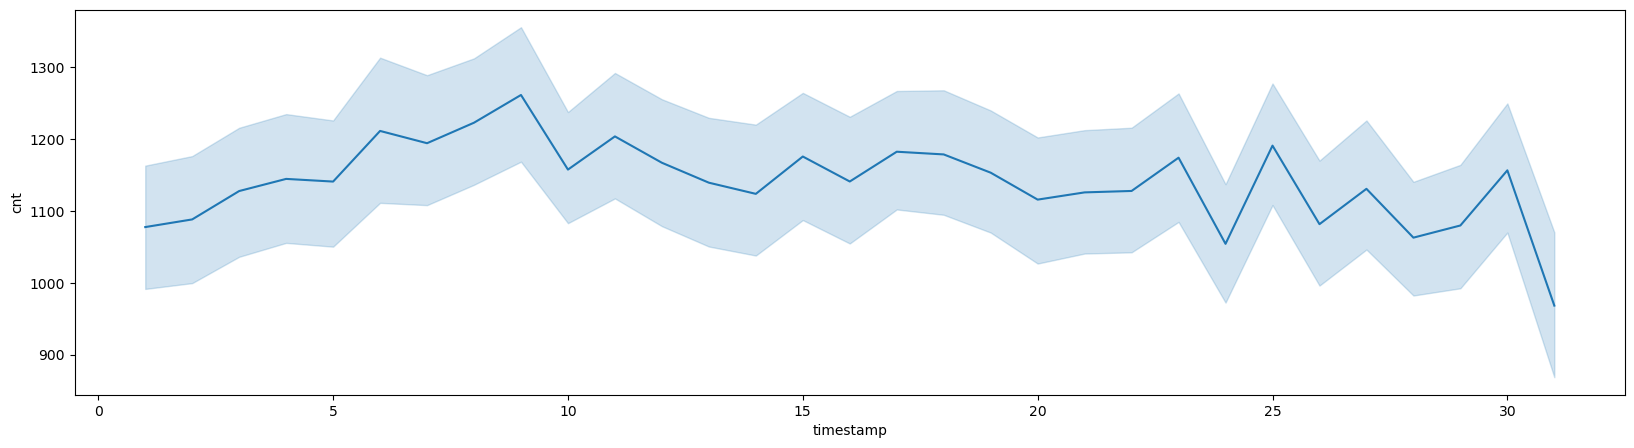

In [32]:
plt.figure(figsize = (20, 5))

sns.lineplot(x = df.index.day, y = 'cnt', data = df)
plt.show()

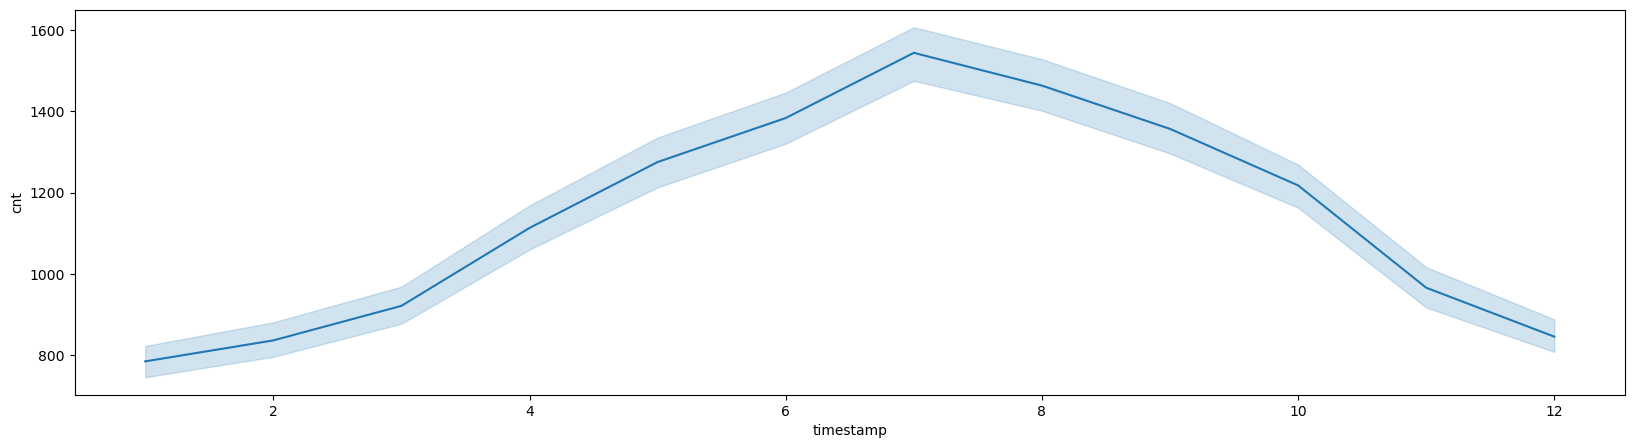

In [33]:
plt.figure(figsize = (20, 5))

sns.lineplot(x = df.index.month, y = 'cnt', data = df)
plt.show()

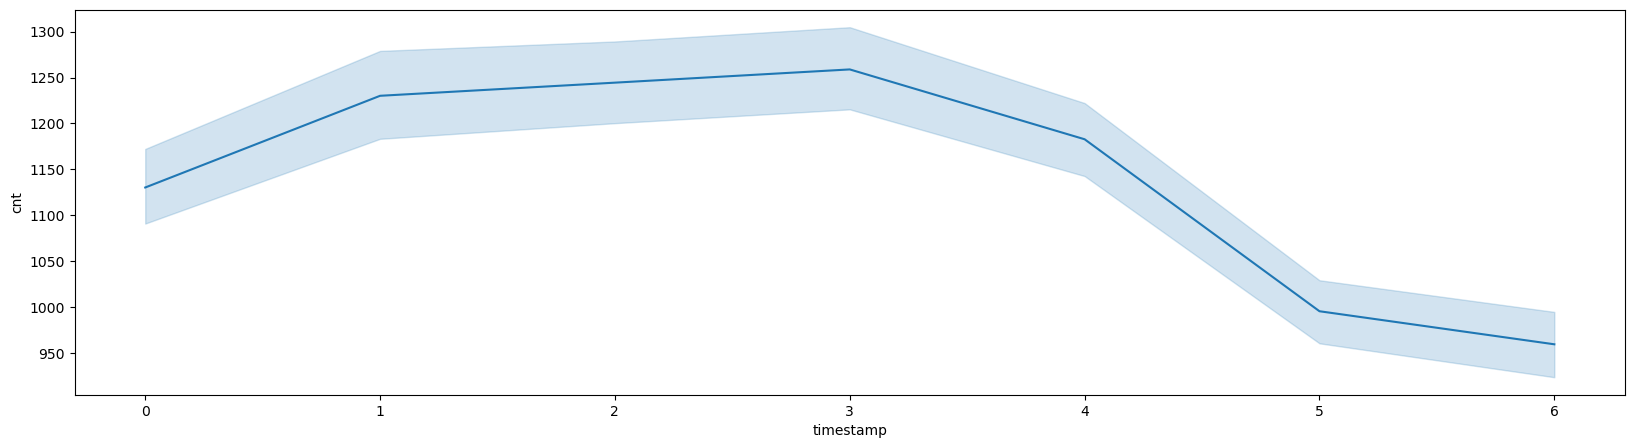

In [35]:
plt.figure(figsize = (20, 5))

sns.lineplot(x = df.index.dayofweek, y = 'cnt', data = df)
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

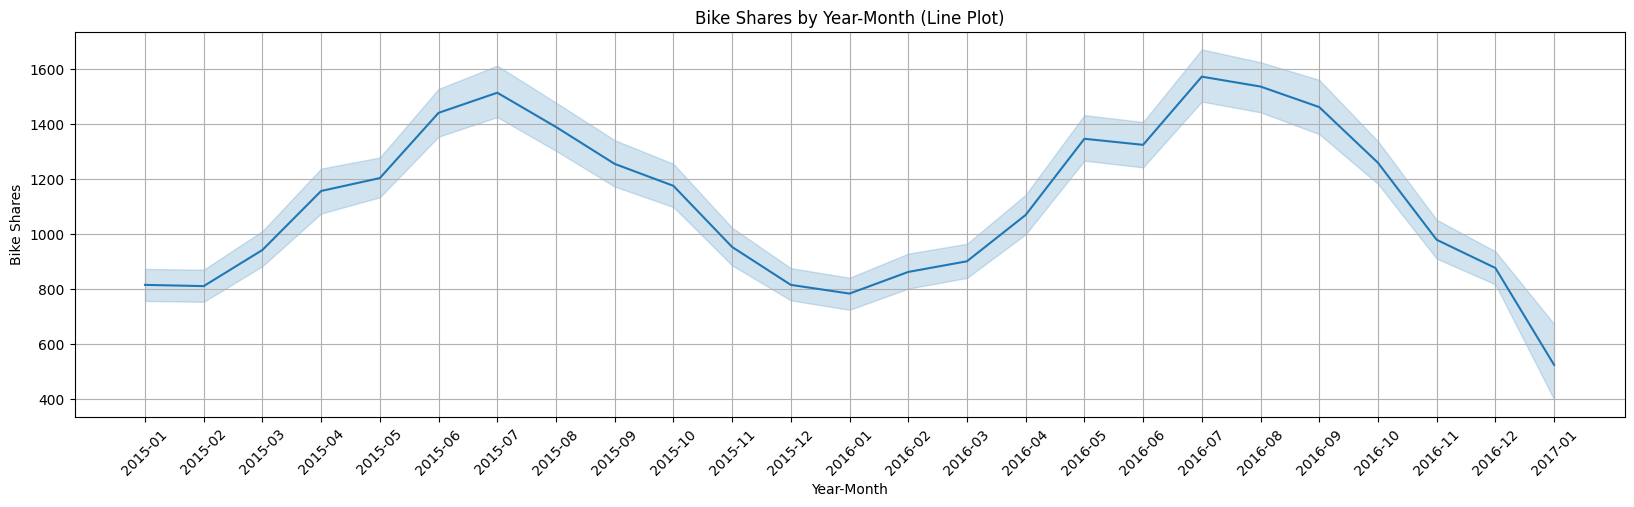

In [31]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='year_month', y='cnt', data=df)
plt.xlabel('Year-Month')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by Year-Month (Line Plot)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

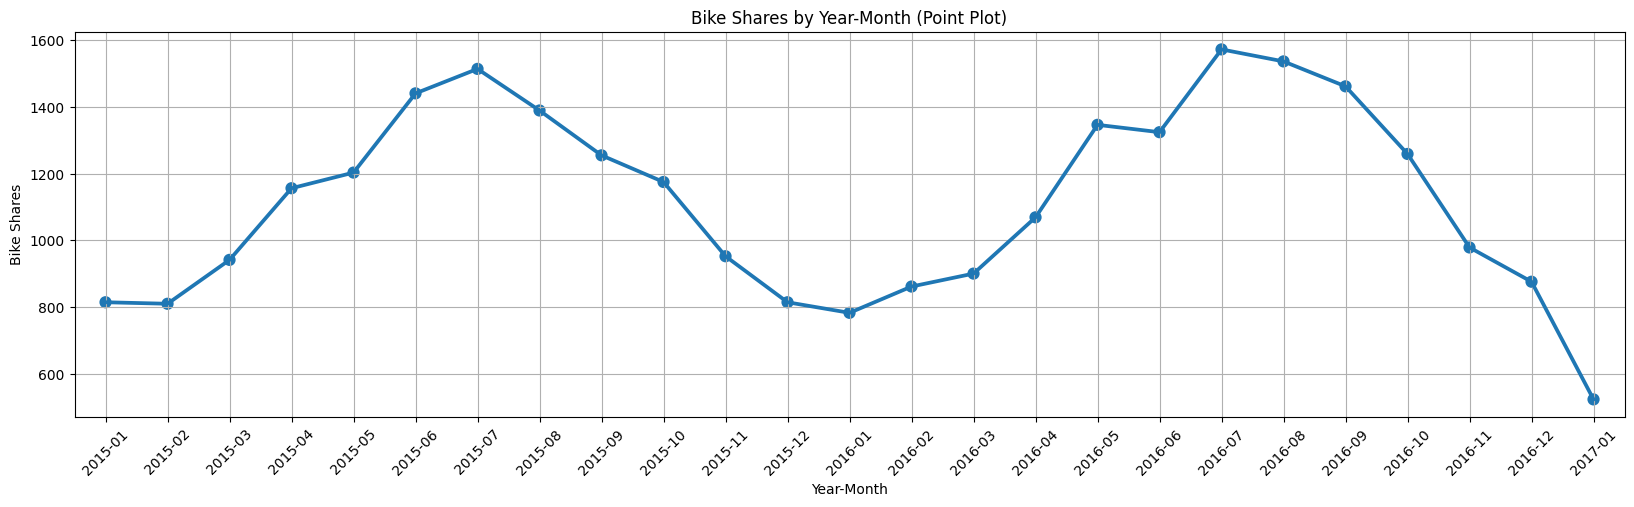

In [32]:
plt.figure(figsize=(20, 5))
sns.pointplot(x='year_month', y='cnt', data=df, ci=None)
plt.xlabel('Year-Month')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by Year-Month (Point Plot)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

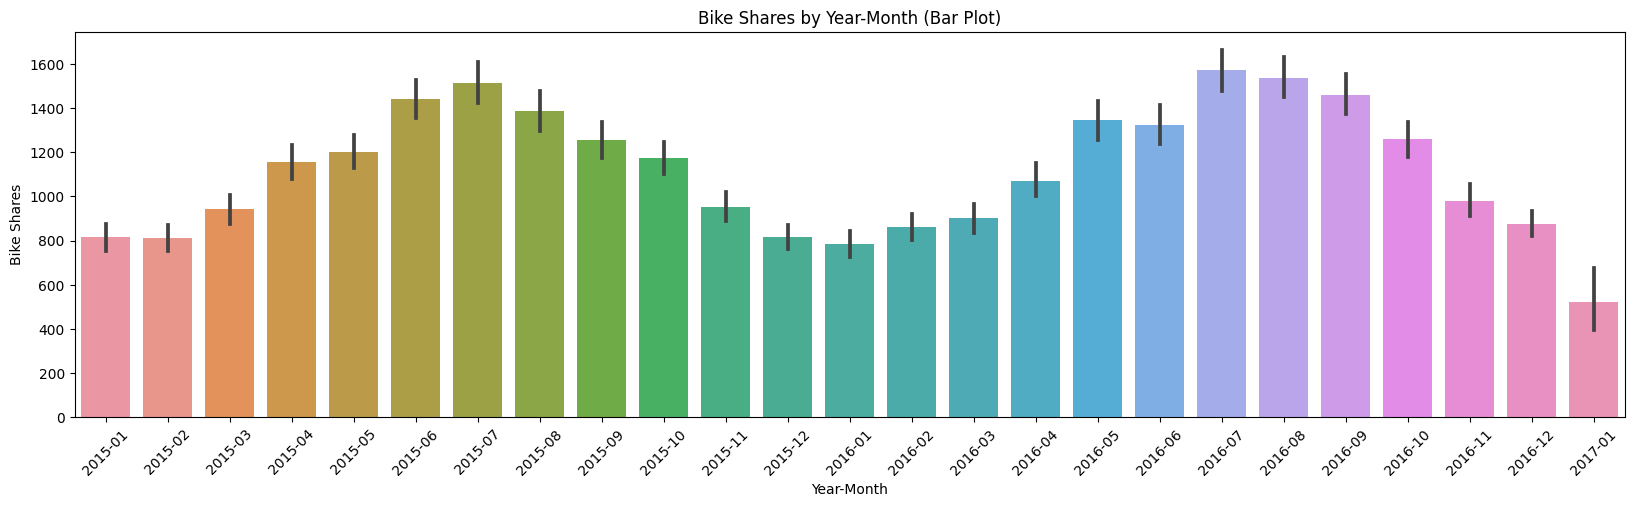

In [33]:
plt.figure(figsize=(20, 5))
sns.barplot(x='year_month', y='cnt', data=df)
plt.xlabel('Year-Month')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by Year-Month (Bar Plot)')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

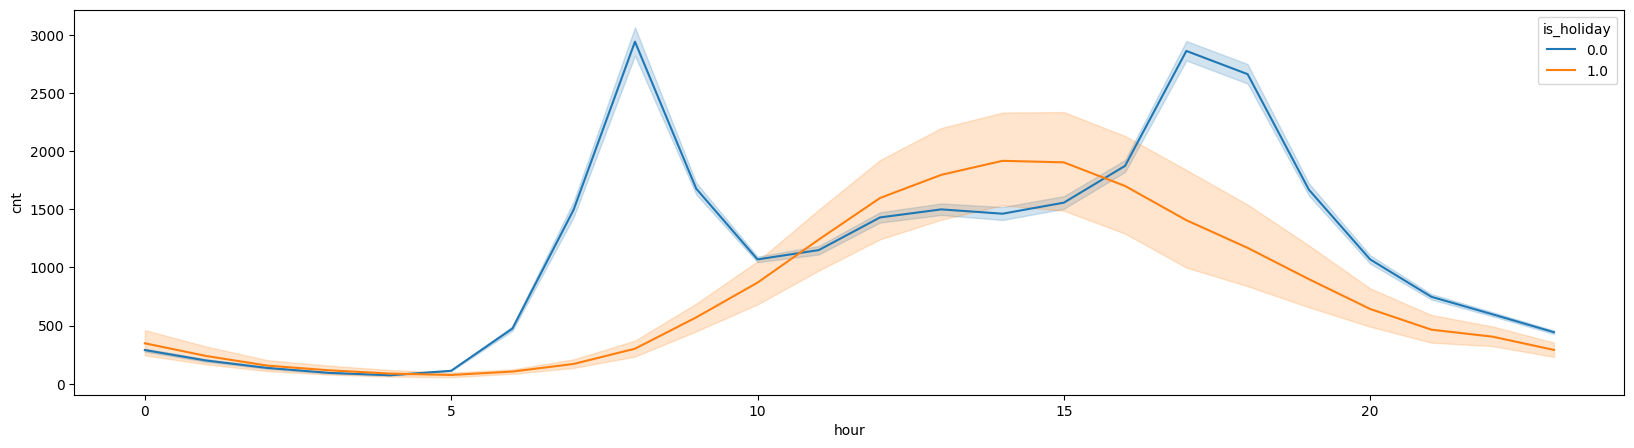

In [34]:
plt.figure(figsize = (20, 5))

sns.lineplot(x = 'hour', y = 'cnt', data = df, hue = 'is_holiday');

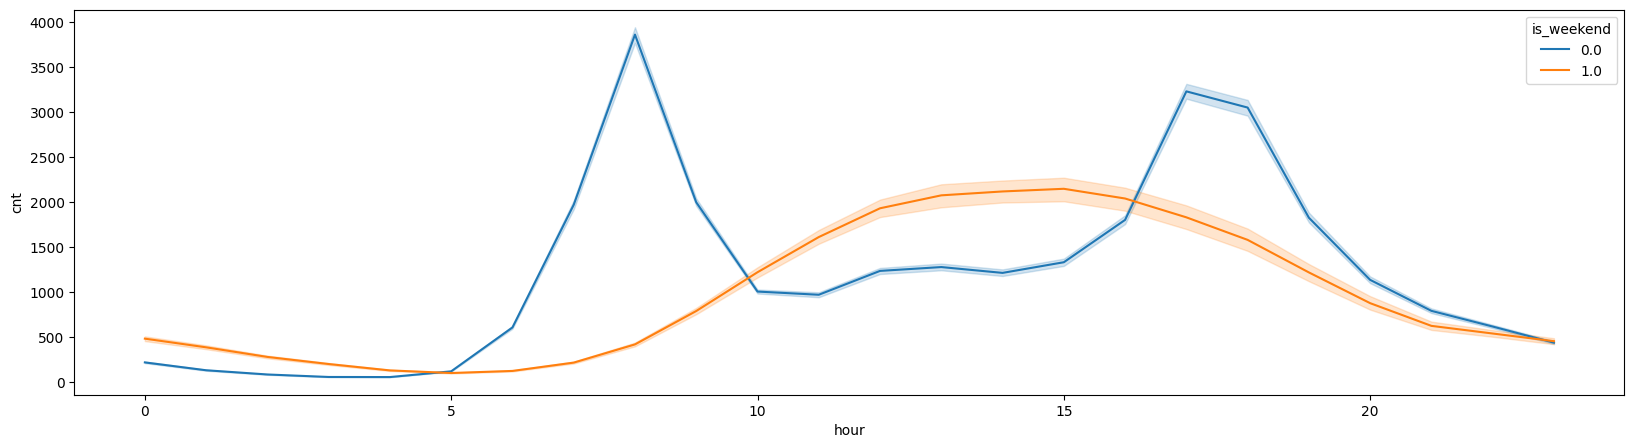

In [35]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = 'hour', y = 'cnt', data = df, hue = 'is_weekend');

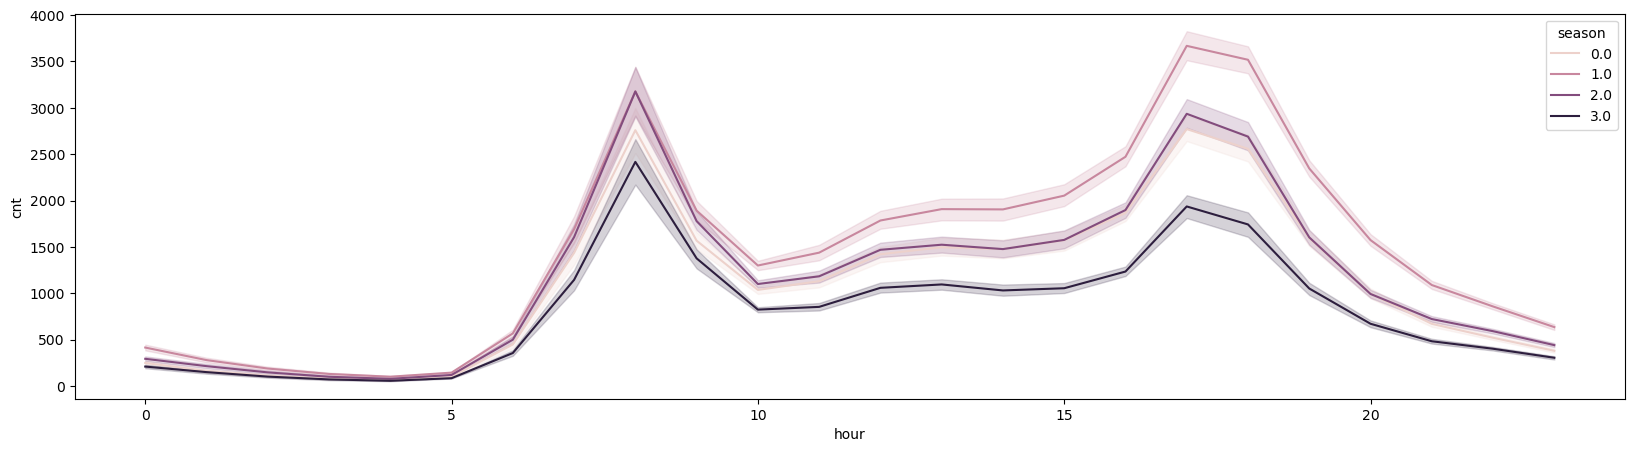

In [41]:
plt.figure(figsize = (20, 5))

sns.lineplot(x = 'hour', y = 'cnt', data = df, hue = 'season')
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

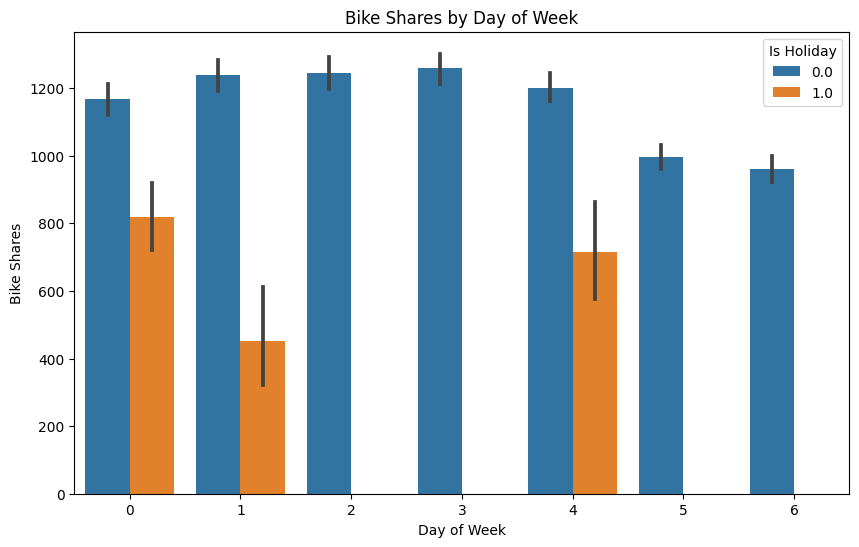

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='day_of_week', y='cnt', hue='is_holiday')
plt.xlabel('Day of Week')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by Day of Week')
plt.legend(title='Is Holiday', loc='upper right')
plt.xticks(rotation=0)
plt.show()


<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

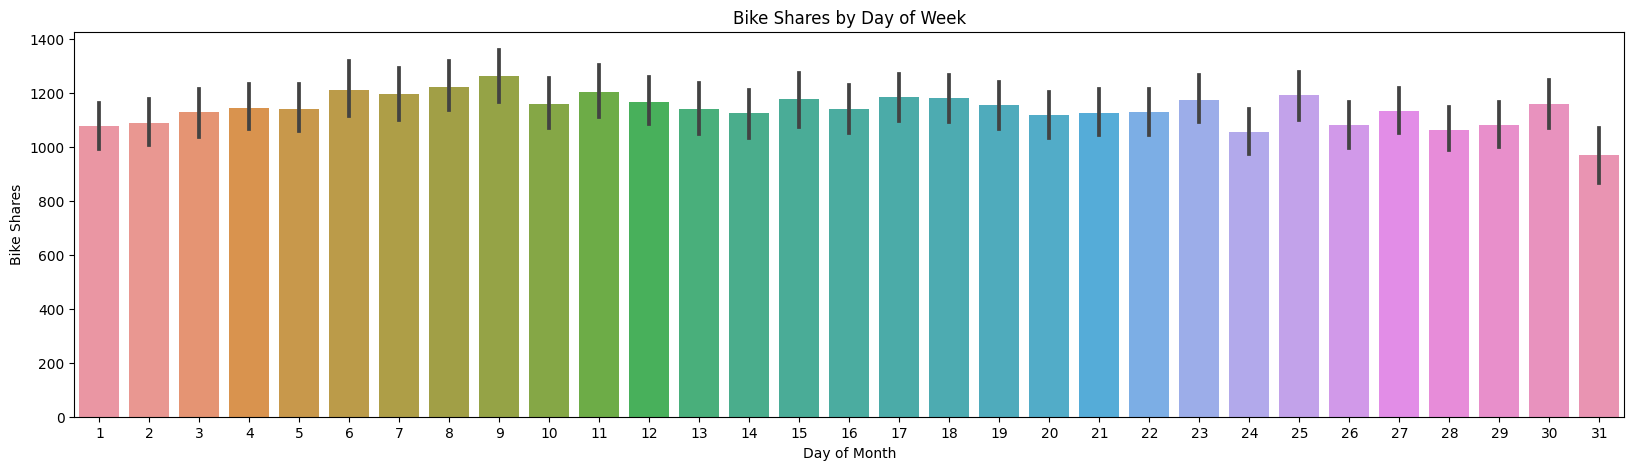

In [38]:
plt.figure(figsize=(20, 5))
sns.barplot(data=df, x='day_of_month', y='cnt')
plt.xlabel('Day of Month')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by Day of Week')

plt.xticks(rotation=0)
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

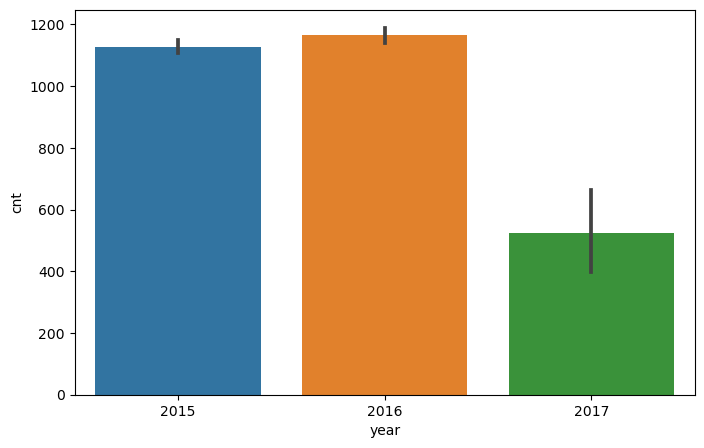

In [39]:
plt.figure(figsize = (8,5))

sns.barplot(x = df.year, y = df.cnt);

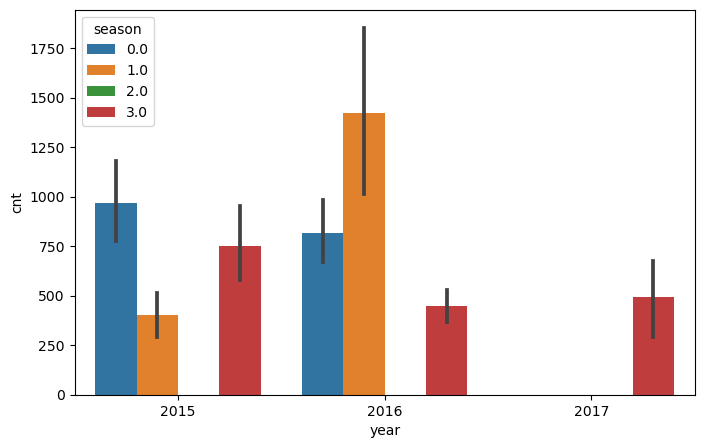

In [40]:
plt.figure(figsize = (8,5))

sns.barplot(x = "year", y = "cnt", data = df[df["is_holiday"] == 1], hue = df.season);

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

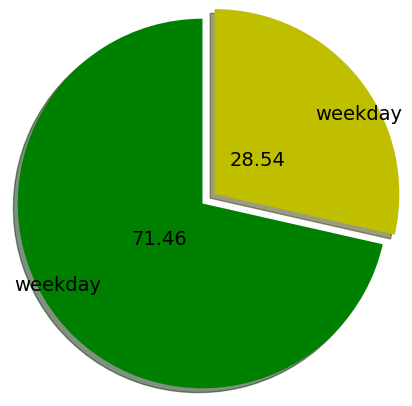

In [42]:
fig, ax = plt.subplots(figsize = (6,5))

ax.pie(x = df.is_weekend.value_counts().values,
       labels = ["weekday", "weekday"],
       explode = [0, 0.1],
       colors = ["g", "y"],
       autopct = "%.2f",
       pctdistance=0.3,
       shadow = True,
       labeldistance = 0.7,
       startangle = 90,
       radius = 1.2,
       textprops = {'fontsize': 14})
plt.show()

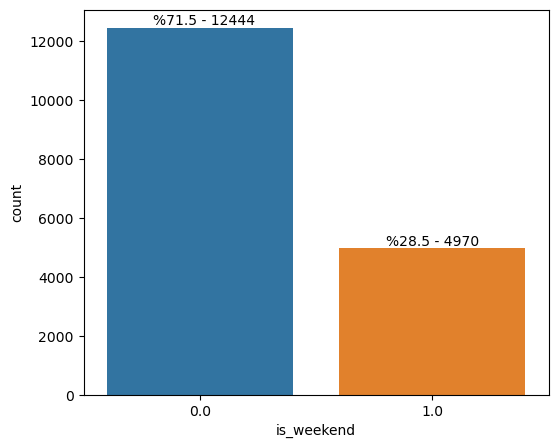

In [49]:
plt.figure(figsize=(6,5))

ax = sns.countplot(x = 'is_weekend', 
                   data = df)

for bar in ax.patches:
    ax.annotate("%" + str(round(100*bar.get_height()/len(df), 1)) + ' - ' + str(bar.get_height() ), 
                (bar.get_x()+0.2, bar.get_height()+100),
                size=10)


<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

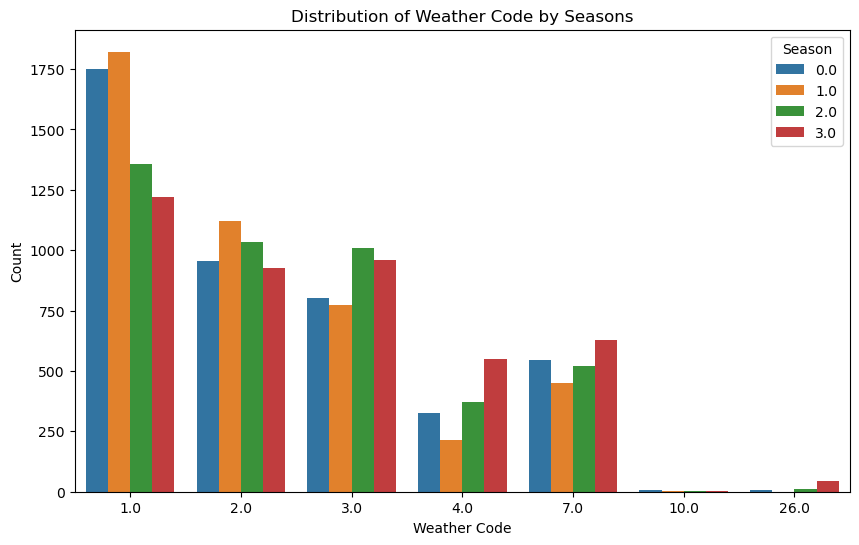

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weather_code', hue='season')
plt.xlabel('Weather Code')
plt.ylabel('Count')
plt.title('Distribution of Weather Code by Seasons')
plt.legend(title='Season', loc="upper right")
plt.show()


<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

People tend to share bcycles as the weather is not foggy, snowy and rainy.
Good weather increases the amount of shared bcycles.
The weekdays has almost no effect on the amount of the bcycles shared.
The amount of the bcycles shared is mainly affected by the hours of the days which are early in the morning and evening times.
We may conclude that people tend to get bcycles before or after work..
Seasons has been changing the preference. cold seasons make people choosing less than warm seasons.
All in all, """people mainly prefer the bycles to get to work""" accordingly with the weather and tempreature.
The matters that affect temperature and weather affect the likeliness people use bcycles to get to work.

<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>